In [147]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2s

In [3]:
x = np.random.rand(100,1)
y = 5*x*x+0.1*np.random.randn(100,1)

\begin{equation}
\hat{\beta}=(X^TX)^{-1}X^Ty
\end{equation}


In [77]:
def secondorderreg(x,y):
    xb=np.array([np.ones(len(x)),x.T[0],x.T[0]**2]).T
    beta=np.linalg.inv(xb.T.dot(xb)).dot(xb.T).dot(y)
    x_pred=np.linspace(0,1,100)
    y_pred=beta[0]+x_pred*beta[1]+x_pred**2*beta[2]
    return x_pred, y_pred

In [110]:
def firstOrderReg(x,y):
    x_test=np.c_[np.ones(100),x]
    beta=np.linalg.inv(x_test.T.dot(x_test)).dot(x_test.T).dot(y)
    xnew = np.linspace(0,1,100)
    y_test=beta[0]+beta[1]*xnew
    return xnew, y_test

In [78]:
a,b=secondorderreg(x,y)

In [111]:
c,d=firstOrderReg(x,y)

[0, 1.0, 0, 5.0]

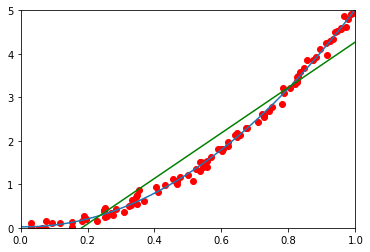

In [112]:
plt.plot(x,y,'ro')
plt.plot(a,b,)
plt.plot(c,d,"g-")
plt.axis([0,1.0,0, 5.0]) #Setter aksene på plottet


In [130]:
MeanSE=(1/len(y)*np.sum((y-d))

SyntaxError: unexpected EOF while parsing (<ipython-input-130-ffc393c5ab48>, line 1)

In [138]:
def meanSquaredError(y,y_pred):
    h=y-y_pred
    r=h**2
    g=np.sum(r)/len(y)
    return g

In [140]:
e=meanSquaredError(y,d)
e

473.06169843814286

In [142]:
f=meanSquaredError(y,b)
f

467.74938804685394

In [145]:
sk_mse=mse(y,d)
sk_mse

4.5546139884134975

In [144]:
sk_mse2=mse(y,b)
sk_mse2

4.5561022297180225

In [146]:
def linearRegressionSkLearn(x,y):
    linreg = LinearRegression()
    linreg.fit(x,y) 
    ypredict = linreg.predict(x)
    meanSE=mse(y,ypredict)
    R2S=r2s(y,ypredict)
    plt.plot(x.T.ravel(),y.T.ravel(),'ro', label="Samples")
    plt.plot(x.T.ravel(), ypredict.T.ravel(), "m", label="Linear regression using sklearn")
    plt.legend()
    plt.title("Linear regression using Sklearn")
    plt.show()
    print("Mean squared error:")
    print(meanSE)
    print("R2-score:")
    print(R2S)

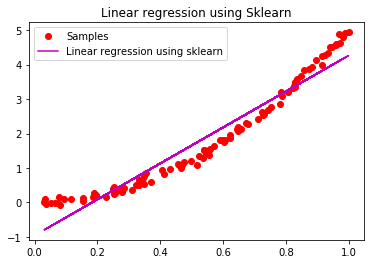

Mean squared error:
0.14997436096610436
R2-score:
0.9364337417065064


In [148]:
linearRegressionSkLearn(x,y)

In [170]:
def R2Score(y,y_est):
    t=np.sum((y-y_est)**2)
    n=np.sum((y-np.mean(y))**2)
    result=1-(t/n)
    return result

In [171]:
y_mean=np.mean(y)

In [163]:
j=y-d
i=j**2
i

array([[ 1.13559836,  1.0258187 ,  0.92161841, ..., 16.46454318,
        16.89596294, 17.33296207],
       [10.49285756, 10.1534672 ,  9.81965622, ...,  3.54956504,
         3.75137411,  3.95876255],
       [23.23301743, 22.7266397 , 22.22584135, ...,  0.09195022,
         0.12677192,  0.16717299],
       ...,
       [ 5.37396315,  5.13187182,  4.89535985, ...,  7.86867576,
         8.16778385,  8.47247131],
       [ 1.98765712,  1.84151806,  1.70095838, ..., 13.78974103,
        14.1848014 , 14.58544114],
       [11.41436658, 11.06026682, 10.71174644, ...,  3.04426269,
         3.23136236,  3.4240414 ]])

In [172]:
R2Score(y,d)

-199.50601928201615

In [173]:
r2s(y,d)

-0.9304617625947793